In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the sales1 data
sales_data_1=pd.read_csv("sales_data_1.csv")
sales_data_1

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


# 1

In [3]:
overall_gross_margin = ((sales_data_1['Selling price'] - sales_data_1['Buying price']).sum() / sales_data_1['Selling price'].sum()) * 100
print("Overall Gross Margin for their Business",overall_gross_margin)

Overall Gross Margin for their Business 23.33236050738993


# 2

In [4]:
vendor_profit = sales_data_1.groupby('Firm bought from')['Selling price'].sum() - sales_data_1.groupby('Firm bought from')['Buying price'].sum()
most_profitable_vendor = vendor_profit.idxmax()
print("Most profitable Vendor:",most_profitable_vendor)

Most profitable Vendor: Vendor7


# 3

In [5]:
customer_profit = sales_data_1.groupby('Customer')['Selling price'].sum() - sales_data_1.groupby('Customer')['Buying price'].sum()
least_profitable_customer = customer_profit.idxmin()
print("Least Profitable Customer:",least_profitable_customer)

Least Profitable Customer: Customer9


# 4

In [6]:
# Extract the day of the week from the date attribute
sales_data_1['Date'] = pd.to_datetime(sales_data_1['Date'])
sales_data_1['day_of_week'] = sales_data_1['Date'].dt.day_name()

# Find the most and least profitable days of the week
profit_by_day = sales_data_1.groupby('day_of_week')['Selling price'].sum() - sales_data_1.groupby('day_of_week')['Buying price'].sum()

most_profitable_day = profit_by_day.idxmax()

print("Most Profitable Day:",most_profitable_day)

Most Profitable Day: Monday


# 5

In [7]:
least_profitable_day = profit_by_day.idxmin()
print("Least Profitable Day:",least_profitable_day)

Least Profitable Day: Thursday


In [8]:
#Read the sales2 data
sales_data_2=pd.read_csv("sales_data_2.csv")

# Sales 2 Data

In [9]:
#First 5 rows of the data
sales_data_2.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,21-08-2023,Vendor6,72.11,60,Customer7,91.58,44
1,21-08-2023,Vendor4,75.08,92,Customer7,83.71,17
2,21-08-2023,Vendor7,83.93,16,Customer2,103.76,15
3,21-08-2023,Vendor7,52.01,62,Customer3,64.53,7
4,21-08-2023,Vendor2,98.91,1,Customer5,140.92,1


# 6

In [20]:
# Calculate a 3-day average of daily gross profit
sales_data_2['Date'] = pd.to_datetime(sales_data_2['Date'])

sales_data_2['gross_profit'] = sales_data_2['Selling price'] - sales_data_2['Buying price']
daily_avg_gross_profit = sales_data_2.groupby('Date')['gross_profit'].mean().rolling(window=3).mean()
print("3 Days Average for the gross profit\n\n",daily_avg_gross_profit)

3 Days Average for the gross profit

 Date
2023-08-21          NaN
2023-08-22          NaN
2023-08-23    18.118333
2023-08-24    14.578667
2023-08-25    14.213667
2023-08-26    14.826333
2023-08-27    18.232000
Name: gross_profit, dtype: float64


# 7

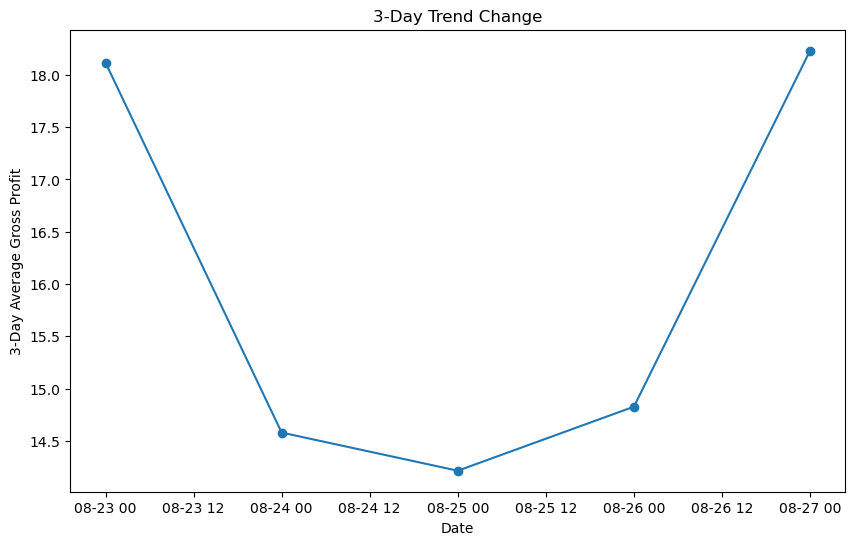

In [11]:
# We can create a line chart to visualize the 3-day trend changes over the time period
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_gross_profit, marker='o', linestyle='-')
plt.title('3-Day Trend Change')
#plt.title('3-Day Rolling Average Gross Profit Trend')

plt.xlabel('Date')
plt.ylabel('3-Day Average Gross Profit')
#plt.grid(True)

# Show the plot
plt.show()

# 8

In [12]:
#Vendors with negative gross profit and consider firing them
negative_profit_vendors = sales_data_2.groupby('Firm bought from')['gross_profit'].sum().loc[lambda x: x < 0].index.tolist()

#Customers with negative gross profit and consider letting them go
negative_profit_customers = sales_data_2.groupby('Customer')['gross_profit'].sum().loc[lambda x: x < 0].index.tolist()

print("Firing Vendor:", negative_profit_vendors)
print("Go of any Customer:", negative_profit_customers)


Firing Vendor: []
Go of any Customer: []


# 9

In [13]:
# Calculate percentiles for buying and selling prices (Question 9)

#Percentile for Buying price
buying_25th_percentile=np.percentile(sales_data_2['Buying price'],25)
buying_50th_percentile=np.percentile(sales_data_2['Buying price'],50)
buying_75th_percentile=np.percentile(sales_data_2['Buying price'],75)
print("Buying Percentiles\n")
print("25th Percentile:",buying_25th_percentile)
print("50th Percentile:",buying_50th_percentile)
print("75th Percentile:",buying_75th_percentile)

Buying Percentiles

25th Percentile: 29.9
50th Percentile: 60.76
75th Percentile: 78.32000000000001


In [14]:
#Percentile for Selling price
selling_25th_percentile=np.percentile(sales_data_2['Selling price'],25)
selling_50th_percentile=np.percentile(sales_data_2['Selling price'],50)
selling_75th_percentile=np.percentile(sales_data_2['Selling price'],75)
print("Selling Percentiles\n")
print("25th Percentile:",selling_25th_percentile)
print("50th Percentile:",selling_50th_percentile)
print("75th Percentile:",selling_75th_percentile)

Selling Percentiles

25th Percentile: 38.975
50th Percentile: 78.99000000000001
75th Percentile: 103.39750000000001


# 10

In [15]:
# Check how often prices fall below 25th and above 75th percentile
below_25th_percentile = ((sales_data_2['Buying price'] < buying_25th_percentile) | (sales_data_2['Selling price'] < selling_25th_percentile)).sum()

above_75th_percentile = ((sales_data_2['Buying price'] > buying_75th_percentile) | (sales_data_2['Selling price'] > selling_75th_percentile)).sum()

total_transactions = len(sales_data_2)

# Calculating percentages
below_25th_percentile=(below_25th_percentile / total_transactions) * 100
above_75th_percentile=(above_75th_percentile / total_transactions) * 100

print(f"Transactions Percentage below the 25th percentile: {below_25th_percentile} %")
print(f"Transactions Percentage above the 75th percentile: {above_75th_percentile} %")

Transactions Percentage below the 25th percentile: 25.71428571428571 %
Transactions Percentage above the 75th percentile: 30.0 %


# 11

In [16]:
# Calculating gross margin without honoring vendor4
optimal_gross_margin_without_vendor4 = (sales_data_2[sales_data_2['Firm bought from'] != 'Vendor4']['Selling price'] - sales_data_2[sales_data_2['Firm bought from'] != 'Vendor4']['Buying price']).mean()

# Calculating gross margin when honoring vendor4
optimal_gross_margin_with_vendor4 = (sales_data_2[sales_data_2['Firm bought from'] == 'Vendor4']['Selling price'] - sales_data_2[sales_data_2['Firm bought from'] == 'Vendor4']['Buying price']).mean()

# Calculating impact on gross margin
impact_on_gross_margin = optimal_gross_margin_with_vendor4 - optimal_gross_margin_without_vendor4

# Print the results
print("Gross Margin without Vendor 4:", optimal_gross_margin_without_vendor4)
print("Gross Margin with Vendor 4:", optimal_gross_margin_with_vendor4)
print("Impact on Gross Margin by honoring Vendor 4:", impact_on_gross_margin)


Gross Margin without Vendor 4: 17.00147540983606
Gross Margin with Vendor 4: 18.901111111111106
Impact on Gross Margin by honoring Vendor 4: 1.899635701275045


# 12

In [17]:
# Calculate the maximum gross margin by assuming the selling price that maximizes profit
sales_data_2['gross_margin'] = (sales_data_2['Selling price'] - sales_data_2['Buying price']) * sales_data_2['Quantity sold']

# Find the selling price that maximizes profit for each row
sales_data_2['optimal_selling_price'] = sales_data_2.apply(lambda row: row['Buying price'] if row['Buying price'] > row['Selling price'] else row['Selling price'], axis=1)

# Calculate total gross margin per vendor
vendor_gross_margin = sales_data_2.groupby('Firm bought from')['gross_margin'].sum()

# Find the vendor with the highest total gross margin
max_profit_vendor = vendor_gross_margin.idxmax()

# Calculate the maximum possible gross margin
max_possible_gross_margin = (sales_data_2['optimal_selling_price'] - sales_data_2['Buying price']) * sales_data_2['Quantity bought']

# Calculate the theoretical maximum gross margin
theoretical_max_gross_margin = max_possible_gross_margin.sum()

# Vendor with the highest total gross margin
print("Vendor for Strategic Tie-Up:", max_profit_vendor)

# Theoretical max gross margin
print("Theoretical Max Gross Margin (Considering Quantity Bought):", theoretical_max_gross_margin)

Vendor for Strategic Tie-Up: Vendor4
Theoretical Max Gross Margin (Considering Quantity Bought): 58630.99


# 13

In [21]:
#Calculating the price elasticity of Sapota

def calculate_price_elasticity(data, price_column, quantity_column):
    elasticity = data.groupby(price_column)[quantity_column].sum().pct_change()
    return elasticity

# Calculate price elasticity for selling price
price_elasticity_selling = calculate_price_elasticity(sales_data_2, 'Selling price', 'Quantity sold')

# Calculate price elasticity for buying price
price_elasticity_buying = calculate_price_elasticity(sales_data_2, 'Buying price', 'Quantity sold')

In [22]:
# Calculating the percentage change in quantity sold when price increases by Rs. 1
increase_price = 1
percentage_change_increase = price_elasticity_selling * increase_price * 100

# Calculating the percentage change in quantity sold when price decreases by Rs. 1
decrease_price = -1
percentage_change_decrease = price_elasticity_selling * decrease_price * 100

print("Price Elasticity of Sapota (Selling Price):", price_elasticity_selling)
print("\nPercentage Change in Quantity Sold for a Rs. 1 Increase in Price:", percentage_change_increase)
print("\nPercentage Change in Quantity Sold for a Rs. 1 Decrease in Price:", percentage_change_decrease)


Price Elasticity of Sapota (Selling Price): Selling price
11.65           NaN
12.26     -0.640000
14.31      3.444444
14.78     -0.900000
16.25     -0.250000
            ...    
131.98     5.133333
132.53    -0.902174
135.33     3.555556
140.92    -0.975610
146.76    61.000000
Name: Quantity sold, Length: 69, dtype: float64

Percentage Change in Quantity Sold for a Rs. 1 Increase in Price: Selling price
11.65             NaN
12.26      -64.000000
14.31      344.444444
14.78      -90.000000
16.25      -25.000000
             ...     
131.98     513.333333
132.53     -90.217391
135.33     355.555556
140.92     -97.560976
146.76    6100.000000
Name: Quantity sold, Length: 69, dtype: float64

Percentage Change in Quantity Sold for a Rs. 1 Decrease in Price: Selling price
11.65             NaN
12.26       64.000000
14.31     -344.444444
14.78       90.000000
16.25       25.000000
             ...     
131.98    -513.333333
132.53      90.217391
135.33    -355.555556
140.92      97.560976
14